# This notebook contains the Stacks parameter tests, final scripts used and analyses to identify sex linked markers for the ddRADseq dataset of <i>Rana ornativentris</i> 
## Sample set:

### There are two populations in this data:

Both in the northern part of Japan

Hirosaki - "h" population  
Oga = "o" population

In [53]:
%matplotlib inline
import os
import Incremental_U as IncU 
import Incremental_C as IncC
import Incremental_Pop_mod as IncPop
import MISC_RAD_tools as MISC
import pprint
import subprocess

In [54]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


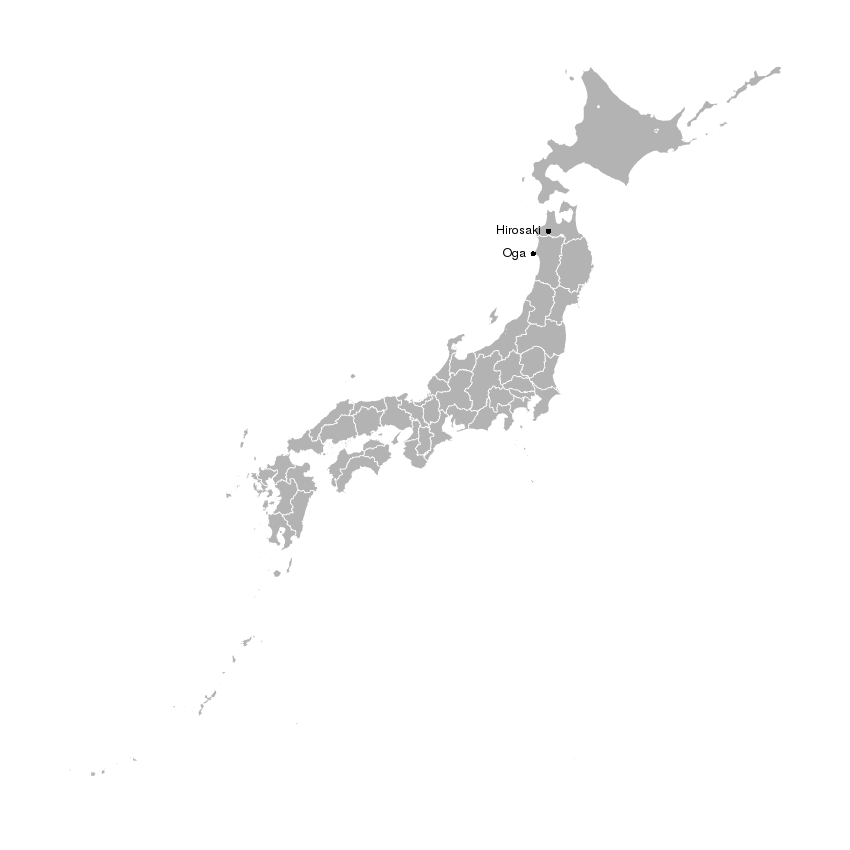

In [16]:
%%R -w 30 -h30 -u cm
library(maps)
library(mapplots)
library(mapdata)
library(calibrate)

Hirosaki = c(140.392449, 40.596279)
Oga = c(139.834857, 39.919922)


map("japan", col="gray70", fill=TRUE, border = "white")

points(140.392449, 40.596279, pch = 16, col = "black")
textxy(140.392449, 40.596279, "Hirosaki", col = "black", cex = 1, pos = 2)

points(139.834857, 39.919922, pch = 16, col = "black")
textxy(139.834857, 39.919922,"Oga", col = 'black', cex = 1, pos = 2)


### First ran populations using the population assignments, to look at structure between them

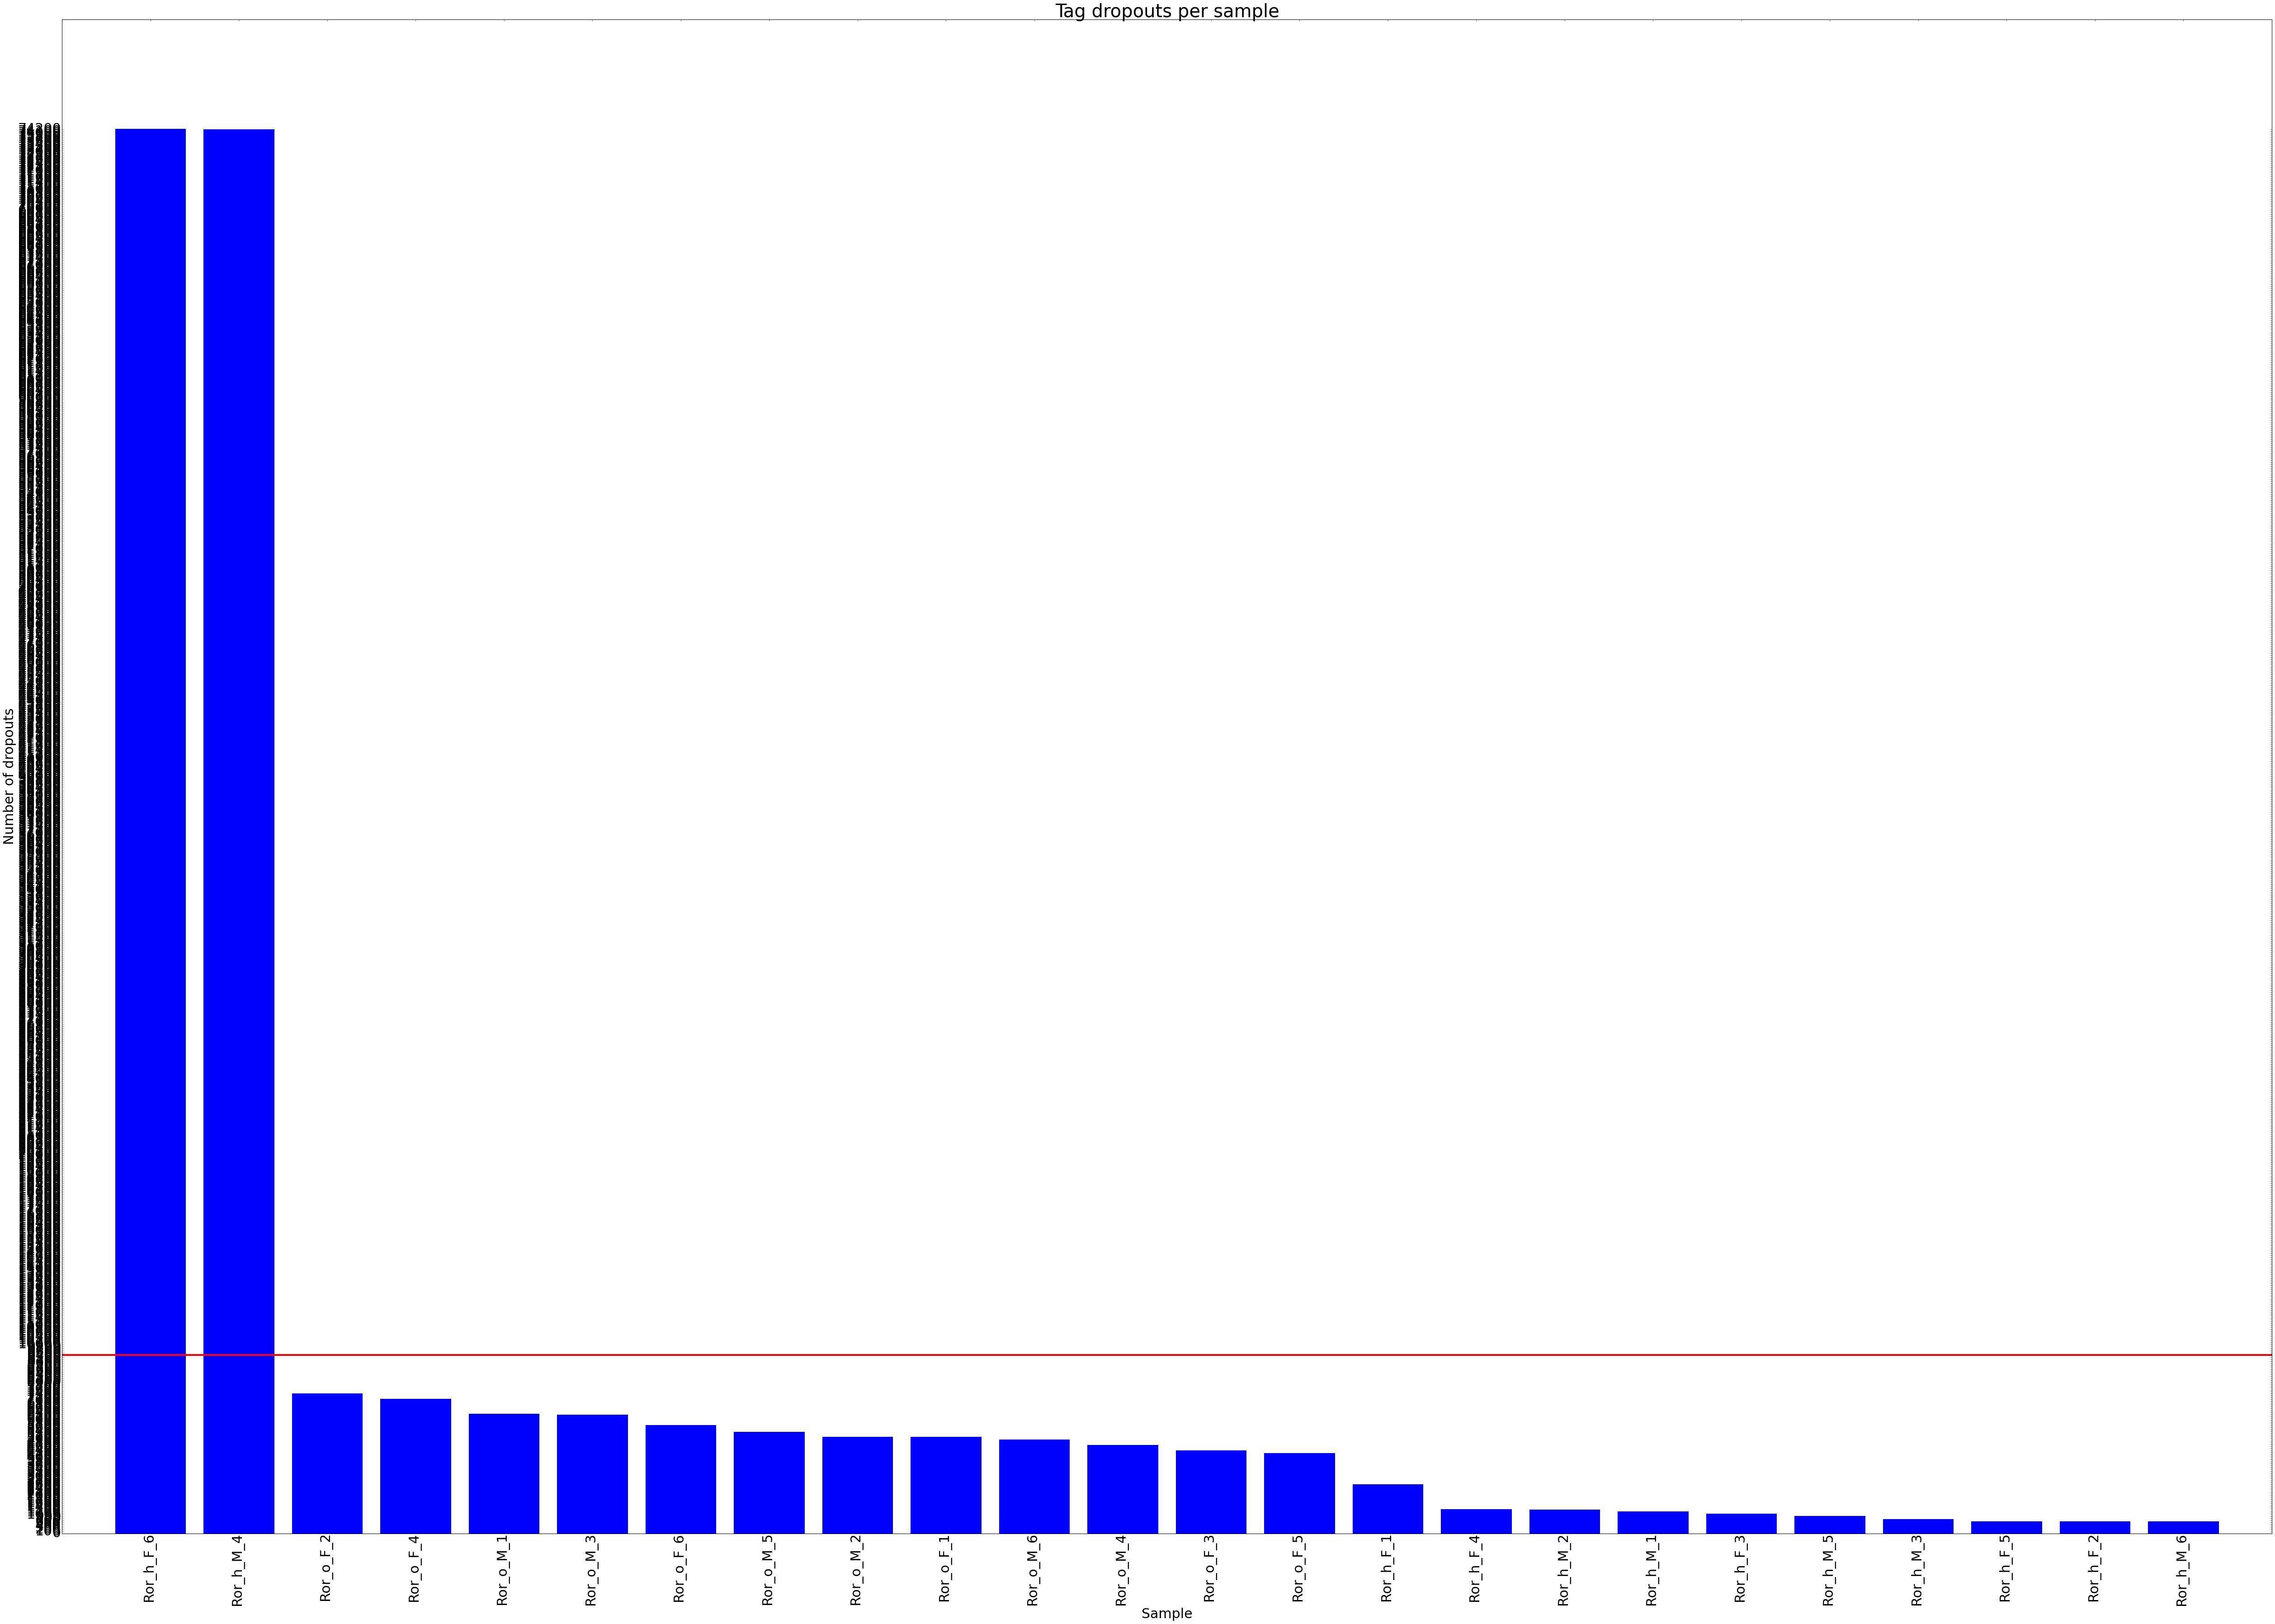

Outputs written to:
/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_all//Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_all//Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_all//Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_all//Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_all//blacklist.txt


In [19]:
wd = "/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_all/"

blacklist = MISC.missing_data_finder("%s/batch_1.vcf" % wd, wd)

Removed Ror_h_F_6, Ror_h_M_4

Kept almost 9000 more loci

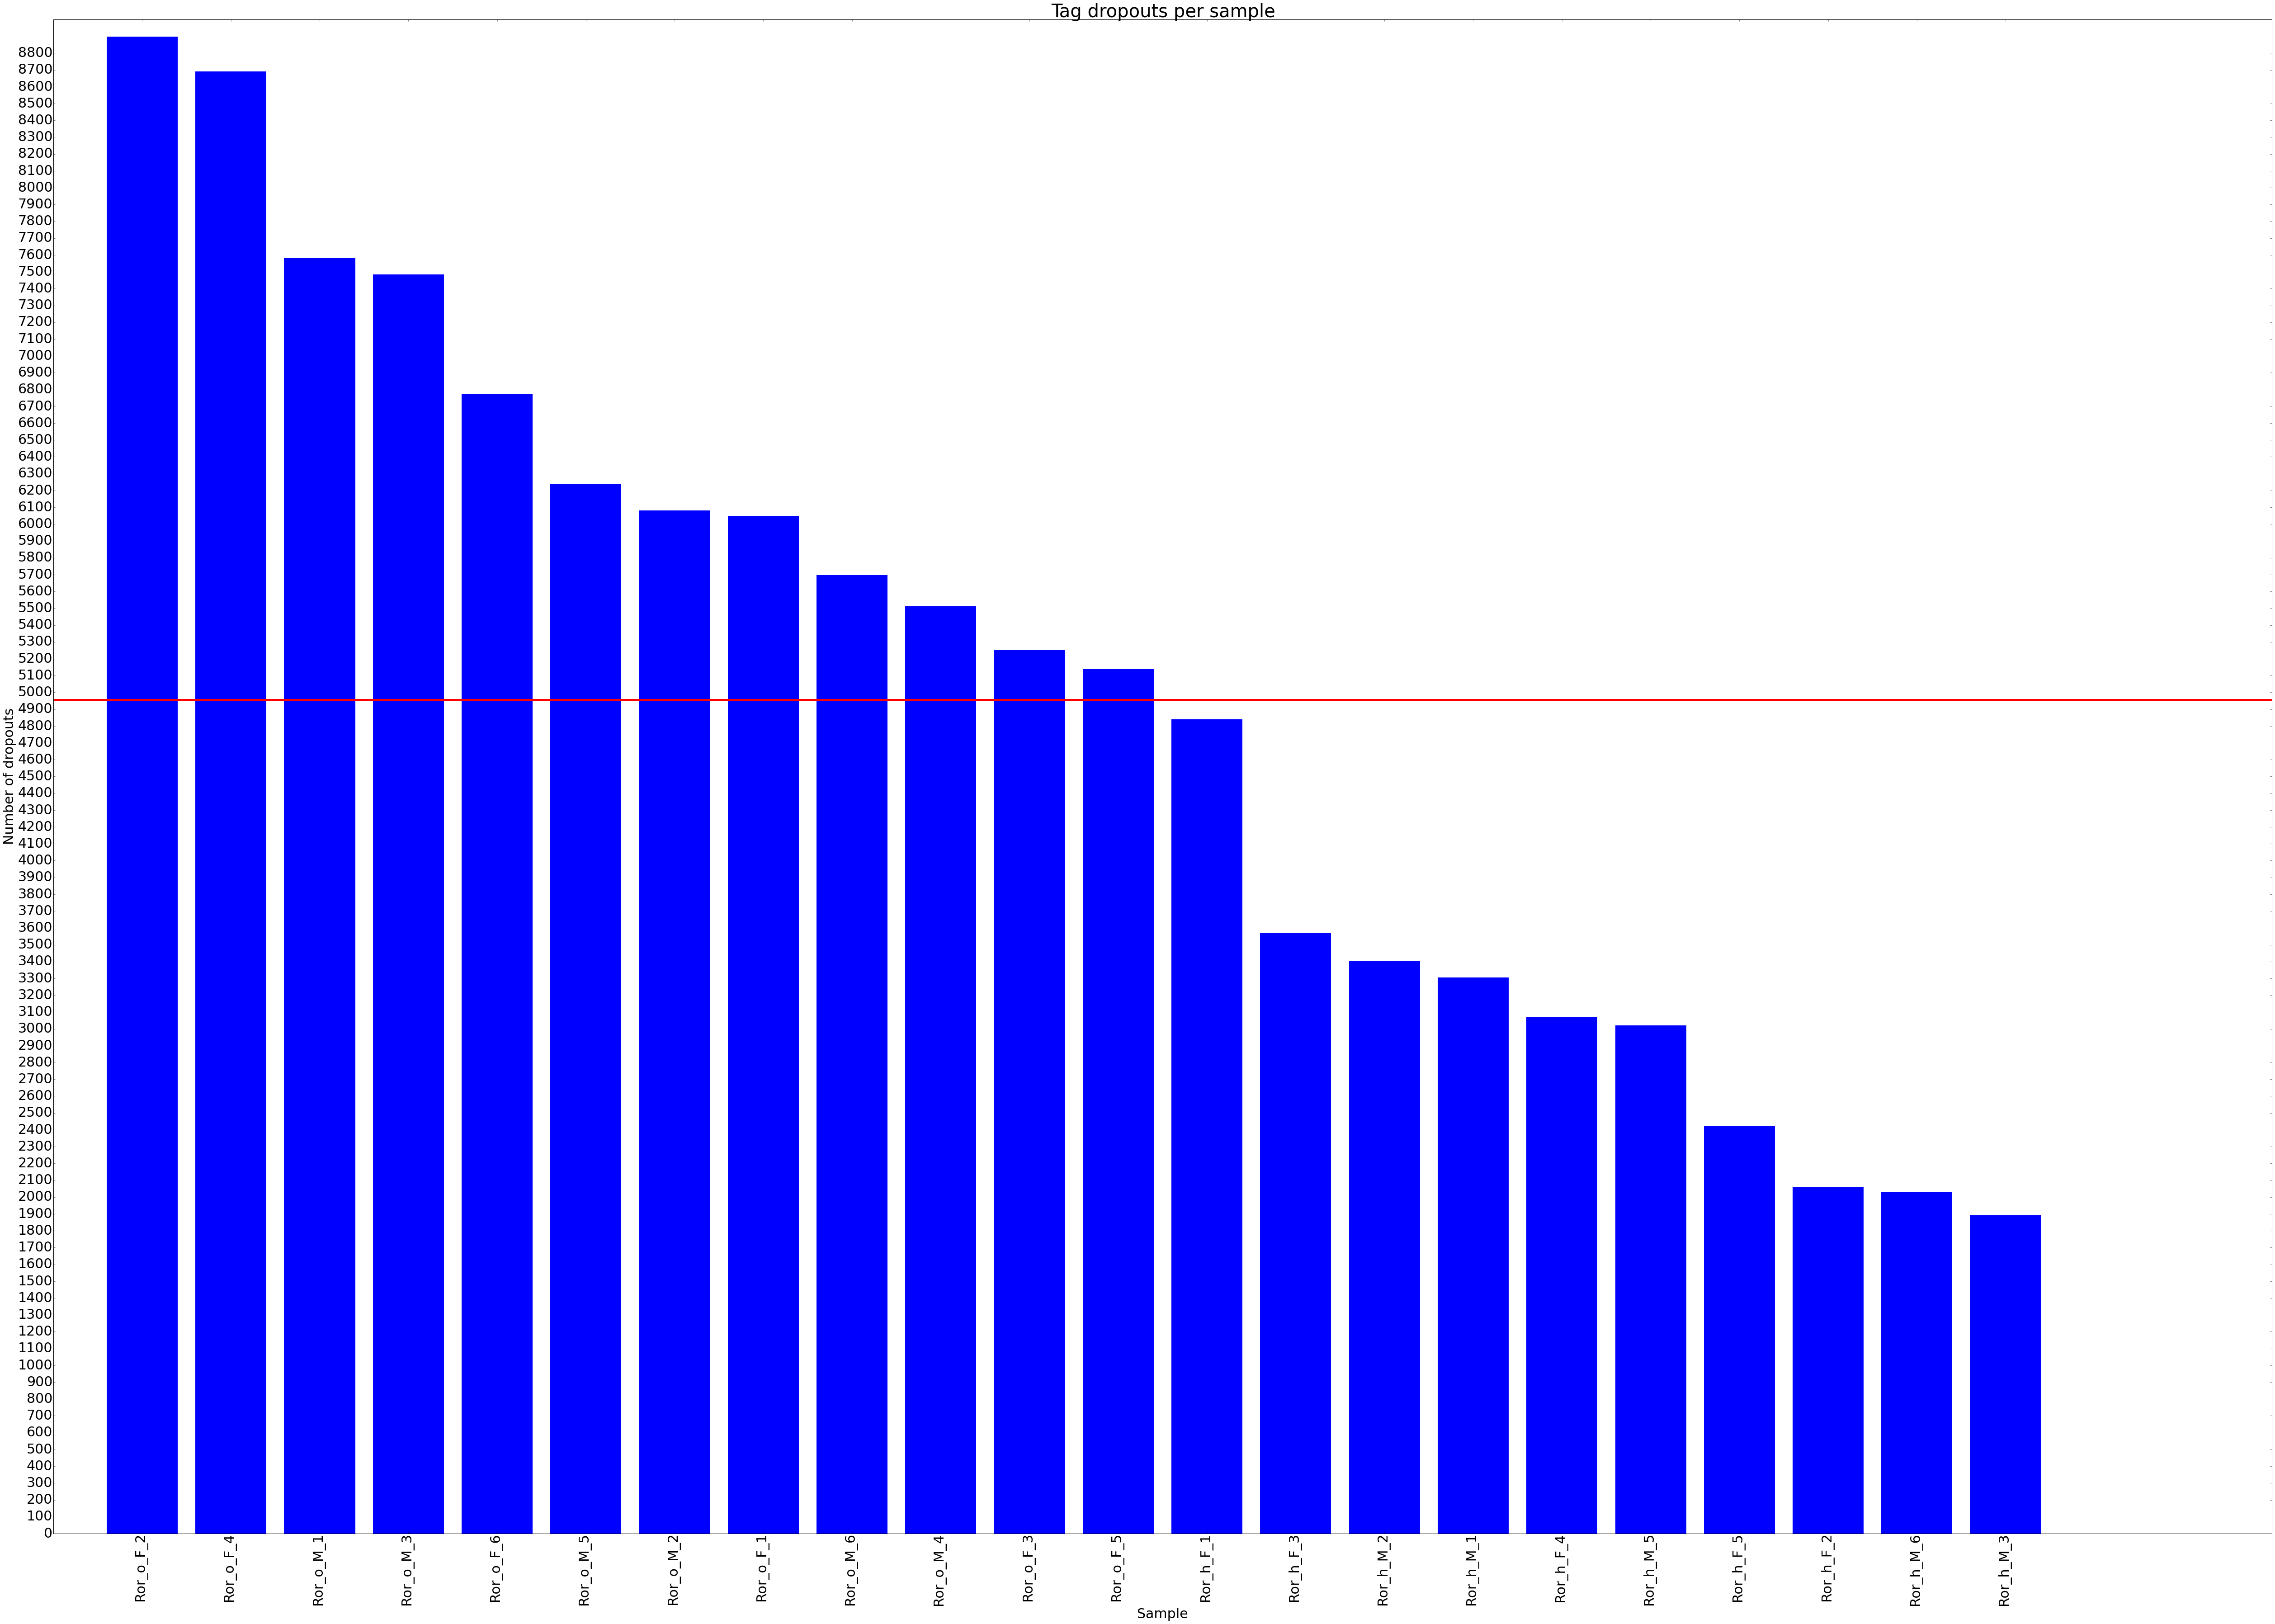

Outputs written to:
/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_all_kept//Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_all_kept//Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_all_kept//Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_all_kept//Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_all_kept//blacklist.txt


In [20]:
wd = "/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_all_kept/"

blacklist = MISC.missing_data_finder("%s/batch_1.vcf" % wd, wd)

#### So still a bit of variation in the quality of samples, but retained a good number of loci

### Now run a PCA to look at the structure in the data . . . 

In [21]:
%%bash

wd=/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_all_kept//  ## just change this line

## All data 
sed 's/_/-/g' $wd/batch_1.vcf > $wd/batch_1_altered_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/batch_1_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/batch_1_altered_adegenet_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_all_kept///batch_1_altered_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_all_kept///batch_1_altered_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_all_kept///batch_1_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_all_kept///batch_1_altered_adegenet_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_all_kept///batch_1_altered_adegenet_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_all_kept///batch_1_altered_adegenet_plink-temporary.fam
written.
83537 variants lo

In [23]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_all_kept/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('batch_1_altered_adegenet_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("./popmap_kept.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 6, nf = 5) 



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



In [38]:
%%R
library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

In [39]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "L Pipiens pop structure", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = rainbow(12), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 


Error in grDevices::pdf(..., version = version) : 
  failed to load default encoding


There seems to be quite a lot of variation in the "o" population. But very little in the "h" population. 

Strategy for finding sex linked markers will be, 1st analyse all of them together. Then try just the "o" population and "h" population separately. 

#### Combined populations

In [60]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Rornativentris/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_both_pops_by_sex/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_both_pops_by_sex/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.9 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.5 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.9 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.6 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 80426
Number of samples = 22
Number of loci with too few samples = 13072
Number of loci with low MAF = 14383
Number of loci with enough data = 52970
Number of putative X linked snps = 95
Number of putative X linked tags = 95
Number of putative Z linked markers = 46
Number of putative Z linked tags = 46


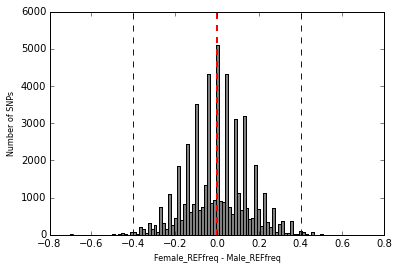


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 80426
Number of samples = 22
Number of loci with too few samples = 14598
Number of loci with low MAF = 12857
Number of loci with enough data = 52970
Number of putative X linked snps = 63
Number of putative X linked tags = 63
Number of putative Z linked markers = 70
Number of putative Z linked tags = 70

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of males: 11
Number of males: 11
Number of Putative Y linked tags: 14
Number of Putative W linked tags: 7

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Rornativentris/Stacks

 ## After merging tags accross methods ## 

Final number of XY tags = 171
Final number of ZW tags = 122


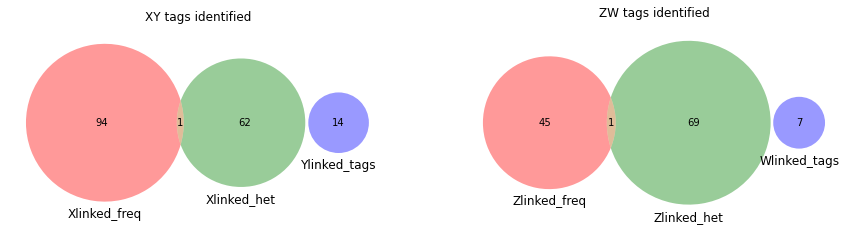

In [61]:
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

### "h" population

Note, only have 5 males and 5 females, but they are from a single clutch

In [13]:
%%bash

wd=/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_h_only/  ## just change this line

## All data 
sed 's/_/-/g' $wd/batch_1.vcf > $wd/batch_1_altered.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/batch_1_altered.vcf --recode A --allow-extra-chr -out $wd/batch_1_altered_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_h_only//batch_1_altered_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_h_only//batch_1_altered_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_h_only//batch_1_altered.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_h_only//batch_1_altered_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_h_only//batch_1_altered_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_h_only//batch_1_altered_plink-temporary.fam
written.
51776 variants loaded from .bim file.
10 people (0 males, 0 females, 10 ambiguous) loaded

In [17]:
%%bash

wd=/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_h_only/

sh /home/djeffrie/Dropbox/My_Dropbox_Scripts/Bash/Make_heatmap_input.sh  $wd/batch_1_altered_plink.raw  $wd/batch_1_heatmap_input

In [15]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.R")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_h_only/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('batch_1_altered_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("Sex_ID_info.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 6, nf = 5) 



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Saving 19.7 x 19.7 in image

  warnings.warn(x, RRuntimeWarning)


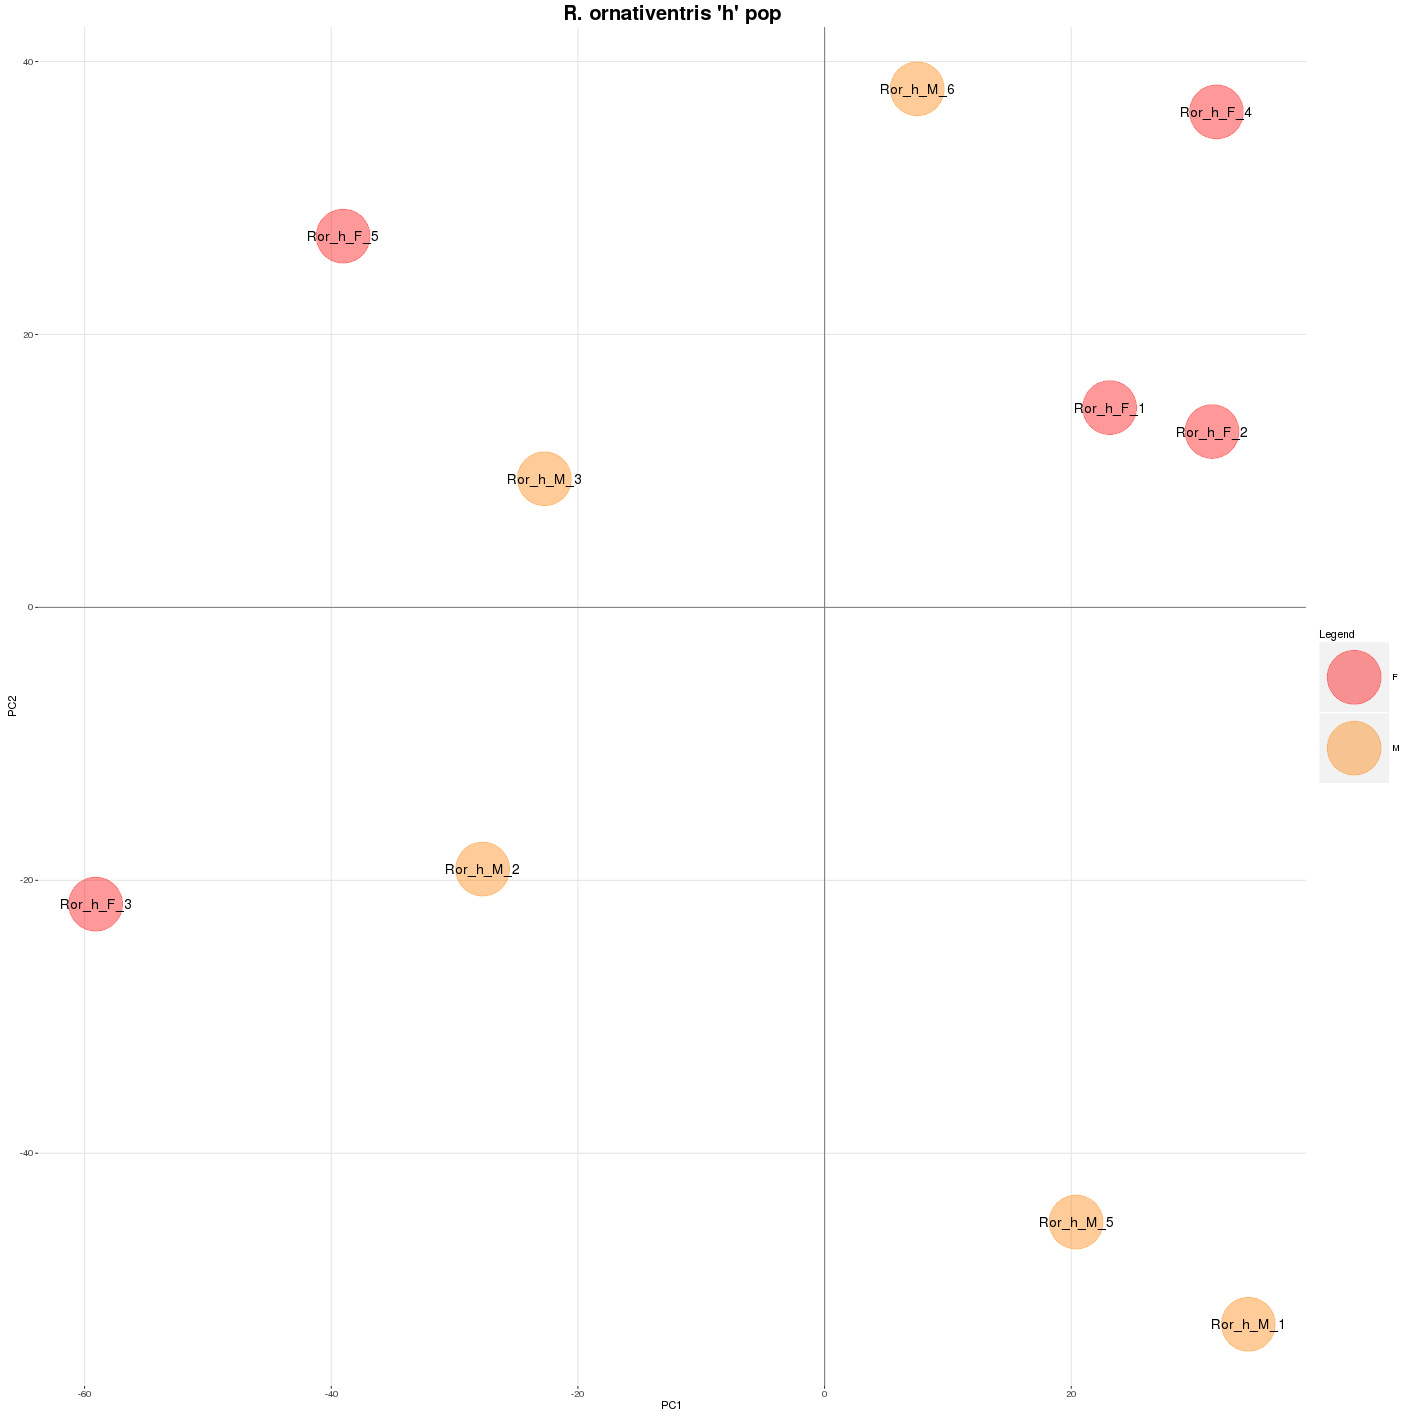

In [16]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "R. ornativentris 'h' pop", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = rainbow(12), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 

In [ ]:
%%R -w 30 -h 30 -u cm

XY_heatmap_data <- read.delim("/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_h_only/batch_1_heatmap_input.raw", row.names = 1)
XY_heatmap_data_sorted <- XY_heatmap_data[order(row.names(XY_heatmap_data), decreasing = T), ]
XY_heatmap_data_datmat <- as.matrix(XY_heatmap_data_sorted)

heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "R. orn")


No structure indicative of males and females

Number of tags =  51776
Average tag coverage 31.6872180161 (+- 20.2065211983 )


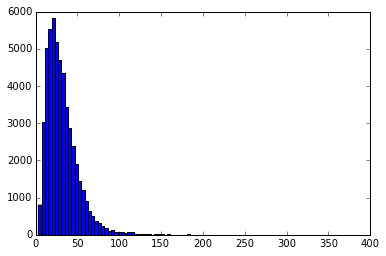

In [1]:
%matplotlib inline
import MISC_RAD_tools as MISC
wd = "/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_h_only"
final_vcf = "%s/batch_1.vcf" % wd
MISC.av_tag_cov(final_vcf, "%s/Av_tag_cov.out" % wd)
#MISC.sample_Avcov_from_vcf(final_vcf)

In [56]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Rornativentris/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_h_only/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_h_only/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.8 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.9 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 51776
Number of samples = 10
Number of loci with too few samples = 14779
Number of loci with low MAF = 0
Number of loci with enough data = 36996
Number of putative X linked snps = 830
Number of putative X linked tags = 830
Number of putative Z linked markers = 585
Number of putative Z linked tags = 585


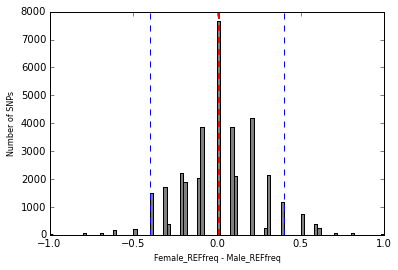


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 51776
Number of samples = 10
Number of loci with too few samples = 14779
Number of loci with low MAF = 0
Number of loci with enough data = 36996
Number of putative X linked snps = 140
Number of putative X linked tags = 140
Number of putative Z linked markers = 364
Number of putative Z linked tags = 364

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 5
Number of males: 5
Number of Putative Y linked tags: 0
Number of Putative W linked tags: 0

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Rornativentris/Stacks

 ## After merging tags accross methods ## 

Final number of XY tags = 836
Final number of ZW tags = 770


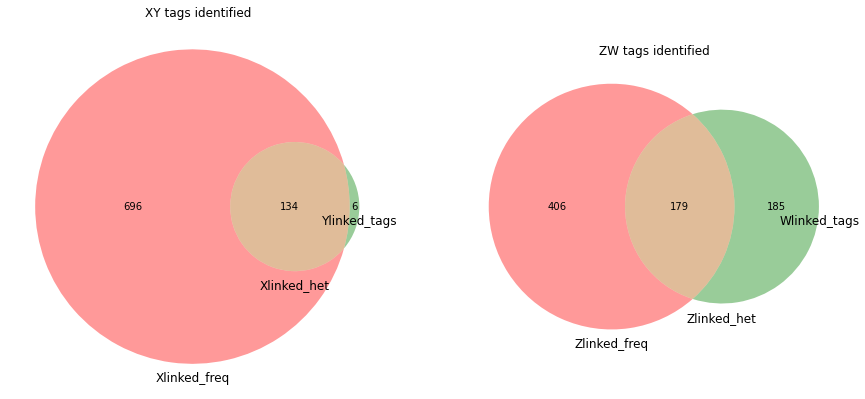

In [57]:
XYset_h, ZWset_h = MISC.Super_SLM_finder(Parameter_dict, "111")

### Population "o"

Number of tags =  56707
Average tag coverage 30.8214770663 (+- 18.3733587491 )


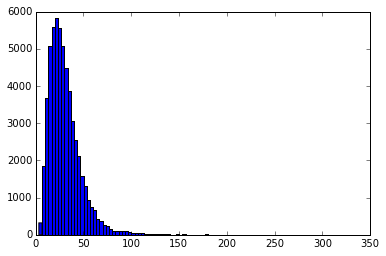

In [2]:
%matplotlib inline
import MISC_RAD_tools as MISC
wd = "/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_o_only"
final_vcf = "%s/batch_1.vcf" % wd
MISC.av_tag_cov(final_vcf, "%s/Av_tag_cov.out" % wd)
#MISC.sample_Avcov_from_vcf(final_vcf)

In [58]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Rornativentris/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_o_only/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_o_only/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 10 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.8 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 10 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.9 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 56707
Number of samples = 12
Number of loci with too few samples = 34650
Number of loci with low MAF = 0
Number of loci with enough data = 22056
Number of putative X linked snps = 452
Number of putative X linked tags = 452
Number of putative Z linked markers = 497
Number of putative Z linked tags = 497


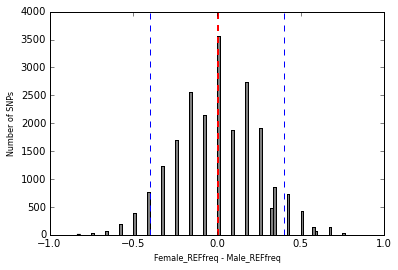


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 56707
Number of samples = 12
Number of loci with too few samples = 34615
Number of loci with low MAF = 0
Number of loci with enough data = 22056
Number of putative X linked snps = 68
Number of putative X linked tags = 68
Number of putative Z linked markers = 244
Number of putative Z linked tags = 244

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 6
Number of males: 6
Number of Putative Y linked tags: 0
Number of Putative W linked tags: 0

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Rornativentris/Stacks

 ## After merging tags accross methods ## 

Final number of XY tags = 480
Final number of ZW tags = 527


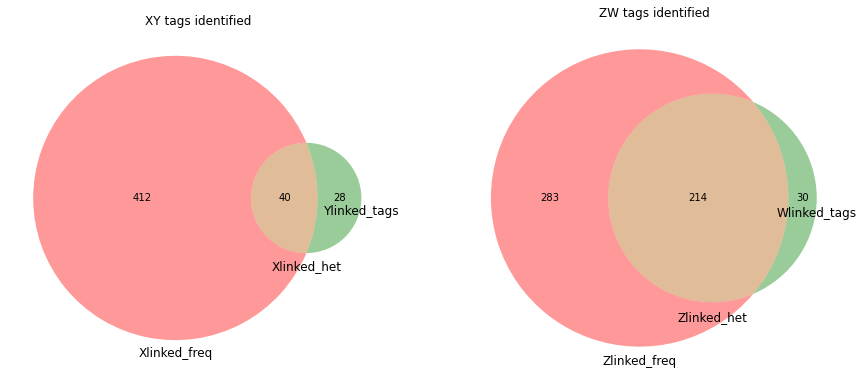

In [59]:
XYset_o, ZWset_o = MISC.Super_SLM_finder(Parameter_dict, "111")

In [ ]:
venn2(  )

### Mapping

The only analysis to pass the randomisations test was the heterozygosity tests for the "o" population, thus these are the ones I will map . . . 

### "o" Population

In [48]:
from Bio.Blast.Applications import NcbiblastnCommandline
import MISC_RAD_tools as MISC
import shutil

Rtemp_fasta = "/home/djeffrie/Data/RADseq/R_temp_fams/Genome_mapping/Final_map_files/Final_ordered_Rtemp_scaffolds/Rtemp_Linkage_map_ordered_scaffolds_XenIDs.fasta"
Rtemp_db = "/home/djeffrie/Data/RADseq/R_temp_fams/Genome_mapping/Final_map_files/Final_ordered_Rtemp_scaffolds/Rtemp_Linkage_map_ordered_scaffolds_XenIDs_blastn_db"


best_hit_crit = 1e-5
Eval_threshold = 1e-20
Window = 10000

wd = "/home/djeffrie/Data/RADseq/Rornativentris/Stacks/"
prefix = "R_orn"

### Tags to Rtemp

print "\n##  Mapping tags to R. temporaria  ##\n"

tags ="%s/%s" % (wd, "Putative_ZWlinked_makers_o_pop_het_only.fa")
tags_to_Rtemp_blastnouts = "%s/%s" % (wd, "%s_%s" % (prefix, "tags_Rtemp_blastnouts.xml"))

blastn_cline = NcbiblastnCommandline(query=tags, db=Rtemp_db, outfmt=5, out=tags_to_Rtemp_blastnouts)
stdout, stderr = blastn_cline()

Rtemp_records = MISC.BlastParseExtra(tags_to_Rtemp_blastnouts, Rtemp_fasta , best_hit_crit, Eval_threshold,Window)




##  Mapping tags to R. temporaria  ##

Number of multi-alingments kept: 6
Number of unique alingments kept: 30


In [49]:
from collections import Counter

hits = []
for i in Rtemp_records:
    hits.append(Rtemp_records[i]["Ref_hit_id"].split("_")[1])
    
Counter(hits)

Counter({'Chr07': 17, 'Chr02': 5, 'Chr03': 4, 'Chr05': 3, 'Chr08': 2, 'Chr06': 2, 'C': 1, 'Chr09': 1, 'Chr04': 1})